# Module 6. Bivariate analysis of 2 quantitative variables

In this module, we discuss the case where both variables are quantitative. Specifically, we'll explore the concept of *linear regression*. Other analysis methods do exist, but those are beyond the scope of this course.

In [2]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

## Visualization

To visualize quantitative data, we can use Seaborn's `relplot()` function. The independent variable should be mapped to the X-axis, the dependent variable to the Y-axis.

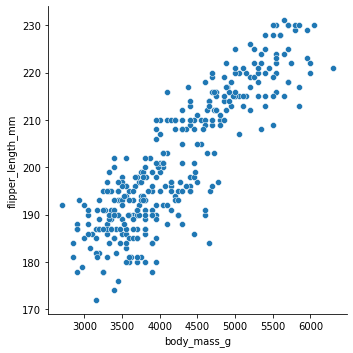

In [89]:
penguins = sns.load_dataset('penguins') # Load the Palmer Penguins demo dataset

sns.relplot(data=penguins, x='body_mass_g', y='flipper_length_mm')

Using other chart attributes like `hue`, `style`, etc. you can also visualize categorical variables in the data set, e.g.:

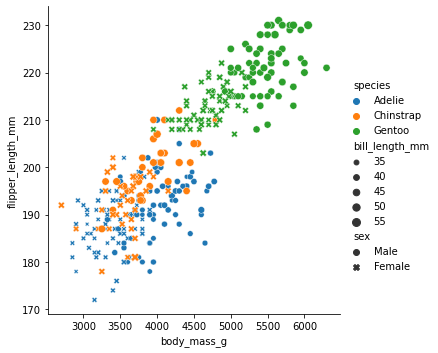

In [94]:
sns.relplot(data=penguins,
            x='body_mass_g', y='flipper_length_mm',
            hue='species', style='sex')

Another example:

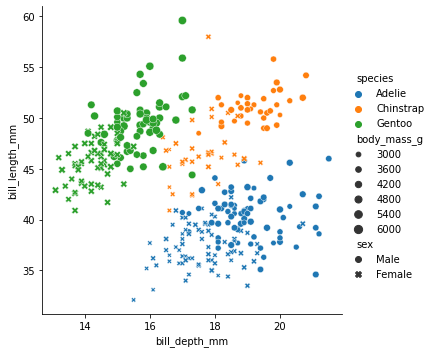

In [99]:
sns.relplot(data=penguins,
            x='bill_depth_mm', y='bill_length_mm',
            size='body_mass_g', 
            hue='species', style='sex')

## Regression

As an example of how to calculate a regression line, we'll use the data that is also used in the slides:

<AxesSubplot:xlabel='x', ylabel='y'>

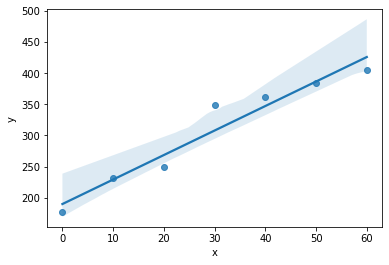

In [9]:
weight_gain = pd.DataFrame(data={
    'x': [0, 10, 20, 30, 40, 50, 60],
    'y': [177, 231, 249, 348, 361, 384, 404]
})
sns.relplot(data=weight_gain, x='x', y='y')

### Method of least squares

We want to approximate a collection of points $(x_i, y_i)$ (with $i: 1, \ldots, n$) as closely as possible with a line $\hat{y} = \beta_0 + \beta_1 x$. The notation $\hat{y}$ stands for "an estimation for $y$". Parameters $\beta_0$ (intercept with the Y axis) and $\beta_1$ (slope) are calculated as follows:


$\beta_1 = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n}(x_i - x)^2}$

$\beta_0 = \overline{y} - \beta_1 \overline{x}$

These values for $\beta_0$ and $\beta_1$ will minimize the sum of the squared deviations between the observed and the fitted values (hence the name of the "method of least squares"). The proof to obtain these values is beyond the scope of this course.

We can calculate $\beta_0$ and $\beta_1$ in Python as follows:

In [32]:
mx = weight_gain.x.mean()
my = weight_gain.y.mean()
xx = weight_gain.x - mx
yy = weight_gain.y - my
beta1 = sum(xx * yy) / sum(xx ** 2)
beta0 = my - beta1 * mx

# Regression line equation
print(f"ŷ = {beta0} + {beta1} x")

ŷ = 189.96428571428572 + 3.925 x


Let's check if the values for $\beta_0$ and $\beta_1$ provide a good approximation of the observed data:

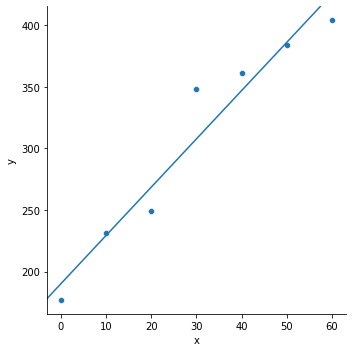

In [17]:
sns.relplot(data=weight_gain, x='x', y='y')
plt.axline((0, beta0), slope=beta1)

You can plot a data set with its regression line as follows:

<AxesSubplot:xlabel='x', ylabel='y'>

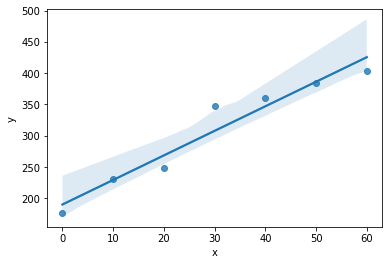

In [31]:
sns.regplot(data=weight_gain, x='x', y='y')

The regression line corresponds with the one we drew using the calculated parameters!

The Python library scikit-learn has code to calculate a linear regression model from a set of observations.

We haven't used this library before, so if you run this notebook locally on your laptop, you need to install it first! e.g. `pip install --user sklearn`.

We can then create an instance of the class `LinearRegression` (see below)and pass the X- and Y-values to be fitted. The array with X-values must be converted in a 2D array as follows:

In [69]:
weight_gain.x.values.reshape((-1,1))

array([[ 0],
       [10],
       [20],
       [30],
       [40],
       [50],
       [60]])

Y-values can be passed to the LinearRegression object as is (`weight_gain.y`).

In [80]:
from sklearn.linear_model import LinearRegression

weightx = weight_gain.x.values.reshape((-1,1))
weighty = weight_gain.y

weight_model = LinearRegression().fit(weightx, weighty)

print(f"Regression line: ŷ = {weight_model.intercept_} + {weight_model.coef_[0]} x")

Regression line: ŷ = 189.9642857142857 + 3.9250000000000007 x


## Covariance

We'll define a `DataFrame` with the data used in the lecture slides:

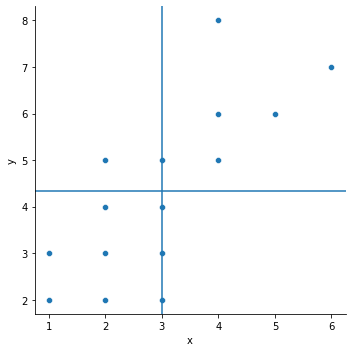

In [22]:
families = pd.DataFrame(data={
    'x': [1,1,2,2,2,2,3,3,3,3,4,4,4,5,6],
    'y': [2,3,2,3,4,5,2,3,4,5,5,6,8,6,7]
})
sns.relplot(data=families, x='x', y='y')
plt.axvline(families.x.mean())  # Plot mean of x
plt.axhline(families.y.mean())  # Plot mean of y

Covariance is defined as: $Cov(X,Y) = \frac{1}{n-1}\sum_{i=1}^n(x_i - \overline{x})(y_i - \overline{y})$

In [26]:
mx = families.x.mean()
my = families.y.mean()

covar = sum((families.x - mx) * (families.y - my)) / (len(families.x) - 1)
print(f"Cov(x,y) = {covar}")

Cov(x,y) = 2.0


To calculate covariance, you can use the Numpy function `cov`. It's a bit complicated to use, because it returns not a single value, but a covariance matrix:

```
cov(a,a)  cov(a,b)
cov(b,a)  cov(b,b)
```

Remark that the definition of `cov(a,a)` reduces to the variance of `a`!

We can extract the value we need with:

In [28]:
np.cov(families.x, families.y, ddof=1)[0][1]

2.0

Remark that we use the parameter `ddof=1` for an unbiased estimate from the sample!

### Pearson's product-moment correlation coefficient

Correlation (or, specifically, Pearson's product-moment correlation coefficient) is defined as:

$R = \frac{Cov(X,Y)}{\sigma_x \sigma_y} = \frac{\sum(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum{(x_i-\overline{x})^2}} \sqrt{\sum{(y_i - \overline{y})^2}}}$

In [34]:
# Correlation calculated from covariance
R1 = covar / (families.x.std() * families.y.std())
print(f"R = {R1}")

R = 0.7533708035008838


In [55]:
# Correlation from elaborated formula
xx = families.x - families.x.mean()
yy = families.y - families.y.mean()
R2 = sum(xx * yy) / (np.sqrt(sum(xx ** 2) * sum(yy ** 2)))
print(f"R = {R2}")

R = 0.7533708035008839


In [58]:
# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(families.x, families.y)[0][1]
print(f"R = {cor}")

R = 0.7533708035008838


### Coefficient of determination

The coefficient of determination is an estimate of the fraction of the variance in the dependent variable that is explained by the independent variable in a simple linear regression. The closer to 1, the more the variance is explained by the regression line, and the stronger the linear relation between the variables. Graphically, the higher the coefficient of determination, the closer the observations are located near the regression line.

The determination coefficient can be calculated as the square of Pearson's correlation coefficient:

In [59]:
cor ** 2

0.5675675675675673

So for this case, about 57% of the variance in the observations is explained by the regression line, which indicates a strong linear relation (see below).

The `LinearModel` class also has a method to calculate the coefficient of determination. We first need to call the `fit()` method and then we can use the method `score()` that returns $R^2$

In [86]:
familiesx = families.x.values.reshape(-1,1)
familiesy = families.y

families_model = LinearRegression().fit(familiesx, familiesy)
families_model.score(familiesx, familiesy)

0.5675675675675678

### Interpretation of R and R²

Depending on the value of $|R|$ (or $R^2$), you can draw a conclusion about the strength of the linear relation between the two variables:

| $abs(R)$  |  $R^2$   | Explained variance |   Linear relation    |
| :-------: | :------: | :----------------: | :------------------: |
|   < .3    |   < .1   |       < 10%        |      very weak       |
|  .3 - .5  | .1 - .25 |     10% - 25%      |         weak         |
|  .5 - .7  | .25 - .5 |     25% - 50%      |       moderate       |
| .7 - .85  | .5 - .75 |     50% - 75%      |        strong        |
| .85 - .95 | .75 - .9 |     75% - 90%      |     very strong      |
|   > .95   |   > .9   |       > 90%        | exceptionally strong |

**Remark** that the value of $R$ doesn't say anything about the steepness of the regression line! It only indicates how close the observations are to the regression line. Therefore, it is **wrong** to say that a value of e.g. $R = 0.8$ indicates a strongly increasing linear relation! Instead, you should say it indicates an _increasing and strong linear relation_.
